# Practice 9 - Trees II (B-Trees) 🌲

## Valenzuela Ascencio Gustavo - 117002029 - EDA II - Group: 2 - Semester: 2024-1 - FI UNAM

### What is a tree? (Reference: https://en.wikipedia.org/wiki/Tree_(data_structure)) 🌳

In computer science a tree is an abstract data type, that represents a hierarchical tree structure with a set of connected nodes. Each node in the tree can be connected to many children (depending on the type of tree), but must be connected to exactly one parent except for the root node, which has no parent.

### B-Tree🌴

Is a self-balancing tree data structure in computer science that is commonly used for organizing and maintaining large datasets, especially in file systems and databases. B-trees are designed to provide efficient insertion, deletion, and retrieval operations, making them particularly well-suited for applications that involve storing and managing large amounts of data, such as file systems and databases.

### B-Tree implementation and analysis using RAM Model

In [3]:
import random
import string

def randString(length=5):
    characters = string.ascii_letters + string.digits
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

class Data:
    def __init__(self,key,value):
        self.key = key
        self.value = value
    
    def __str__(self):
        return "Key: " + str(self.key) + " - Value: " + str(self.value)
    
class BTreeNode:
    def __init__(self,t,leaf):
        self.t = t
        self.keys = [None] * (2 * t - 1)
        self.C = [None] * (2 * t)
        self.n = 0
        self.leaf = leaf

#                                           TIME || SPACE

    def insertNonFull(self,data):
        i = self.n - 1 # 5 || 1
        if self.leaf: # 3 || 1
            while i >= 0 and self.keys[i].key > data.key: # 10 (deg + 1) || 1
                self.keys[i+1] = self.keys[i] # 5 (deg) || 1
                i-=1 # 3 (deg) || 1
            self.keys[i + 1] = data # 6 || 1
            self.n += 1 # 4 || 1
        else: # 1 || 1
            while i >= 0 and self.keys[i].key > data.key: # 10 (deg + 1) || 1
                i-=1 # 3(deg) || 1
            if self.C[i+1].n == 2 * self.t - 1: # 9 || 1
                self.splitChild(i+1, self.C[i+1]) # O(deg) || 1
                if self.keys[i+1].key < data.key: # 7 || 1
                    i+=1 # 4 || 1
            self.C[i + 1].insertNonFull(data) # This is divided by two constantly due to if/else statement
            # 5 (log n) || (log n)      (This is multiplying all function)
    
    # TIME POLYNOMIAL: 44(log n) + 32(log n)(deg) = O(log n)
    # SPACE POLYNOMIAL: 14(log n) = O (log n)
    
    def splitChild(self,i,y):
        z = BTreeNode(y.t, y.leaf) # 13 || 1
        z.n = self.t - 1 # 6 || 1
        for j in range (self.t-1): # 6 (deg) || 1
            z.keys[j] = y.keys[j + self.t]  # 8(deg) || 1
        if not y.leaf: # 4 || 1
            for j in range(self.t): # 6 (deg + 1) || 1
                z.C[j] = y.C[j + self.t] # 8(deg) || 1
        y.n = self.t -1 # 5 || 1
        
        for j in range(self.n, i , -1): # 6 (deg + 1) || 1
            self.C[j + 1] = self.C[j] # 6(deg) || 1
        
        self.C[i+1] = z # 5 || 1
        for j in range(self.n -1,i-1, -1): # 6 (deg) || 1
            self.keys[j+1] = self.keys[j] # 6(deg) || 1
            
        self.keys[i] = y.keys[self.t - 1] # 8 || 1
        self.n += 1 # 5|| 1
        
    # TIME POLYNOMIAL: 52 deg + 46 = O(1)
    # SPACE POLYNOMIAL: 15 = O(1)
    
    def traverse(self,l):
        for i in range(self.n): # 6 (deg+1) || 1
            if not self.leaf: # 4(deg) || 1
                self.C[i].traverse(l+1) # 7(deg * n) being n the number of entries in the tree || deg*n
            print("\t"*l,l,self.keys[i],end = ' ') # O(print) || 1
        print() # O(print) || 1
        if not self.leaf: # 4 || 1
            self.C[i + 1].traverse(l+1) # 7(deg * n) being n the number of entries in the tree || deg * n
        
    # TIME POLYNOMIAL: 24(n) + 10 (deg * n) = O(n)
    # SPACE POLYNOMIAL: 8(deg * n) = O(n)
        
    def search(self,k):
        i = 0 # 3 || 1
        while i < self.n and k > self.keys[i].key: # 10 (deg + 1) || 1
            i+=1 # 4(deg) || 1
        if i < self.n and k == self.keys[i].key: # 10 || 1
            return self # 1 || 1
        if self.leaf: # 4 || 1
            return None # 1 || 1
        return self.C[i].search(k) # We are pruning constantly the half of the values 6(log n) || log n
     
    # TIME POLYNOMIAL: 35(log n) +  14(log n)(deg) = O(log n)
    # SPACE POLYNOMIAL: 8(log n) = O(log n)
    
    
class BTree:
    def __init__(self,t):
        self.root = None
        self.t = t
    
    def traverse(self):
        if self.root != None:
            self.root.traverse(0)
    
    def search(self,k):
        return None if self.root == None else self.root.search(k)
    
    def insert(self, data):
        if self.root == None: # 5 || 1
            self.root = BTreeNode(self.t,True) # 13 || 1
            self.root.keys[0] = data # 7|| 1
            self.root.n = 1 # 5 || 1
        else:
            if self.root.n == 2 * self.t - 1: # 8 || 1
                s = BTreeNode(self.t,False) # 13 || 1
                s.C[0] = self.root # 6 || 1
                s.splitChild(0, self.root) # O(deg) || 1
                i = 0 # 3 || 1
                if s.keys[0].key < data.key: # 8 || 1
                    i+=1 # 4 || 1
                s.C[i].insertNonFull(data) # O(log n) || O (log n)
                self.root = s # 4 || 1
            else: # 1 || 1
                self.root.insertNonFull(data) # O(log n) || O (log n)
    
    # TIME POLYNOMIAL: 2(O(log n)) + O(deg) + 77 = O(log n)
    # SPACE POLYNOMIAL: 8(log n) + 13  = O(log n)

if __name__ == "__main__":
    deg = 2
    t = BTree(deg)
    
    values = [10, 27, 29, 17, 25, 21, 15, 31, 13, 51, 20, 24, 48, 19, 60, 35, 66]
    
    for value in values:
        t.insert(Data(value,randString()))
    
    t.traverse()
    print()
    
    k = 6
    
    if t.search(k) != None:
        print("Found")
    else:
        print("Not found")
        
    k = 24
    
    if t.search(k) != None:
        print("Found")
    else:
        print("Not found")
    


		 2 Key: 10 - Value: RlZ3o 		 2 Key: 13 - Value: Ix8VZ 		 2 Key: 15 - Value: 2CcV1 
	 1 Key: 17 - Value: jwBJd 
		 2 Key: 19 - Value: BEscg 		 2 Key: 20 - Value: 9n8PZ 
 0 Key: 21 - Value: FxOei 		 2 Key: 24 - Value: GK8hw 		 2 Key: 25 - Value: Srrzh 
	 1 Key: 27 - Value: 5gH4p 
		 2 Key: 29 - Value: 7soSa 
 0 Key: 31 - Value: WU02E 
		 2 Key: 35 - Value: i1Boh 		 2 Key: 48 - Value: U33SP 
	 1 Key: 51 - Value: l9G0b 
		 2 Key: 60 - Value: 4hP4M 		 2 Key: 66 - Value: yrwm3 

Not found
Found


### Complexity graphs

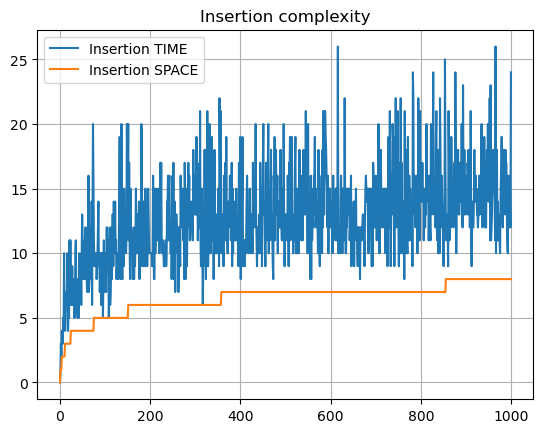

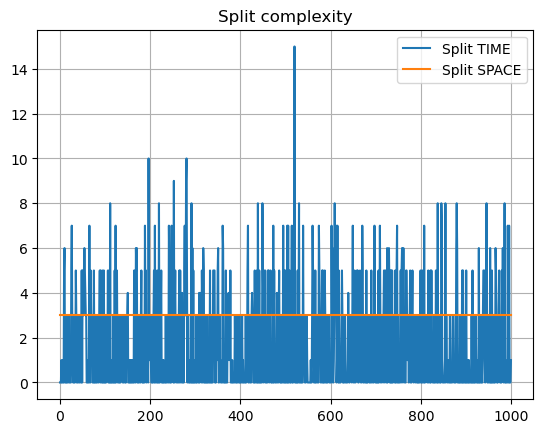

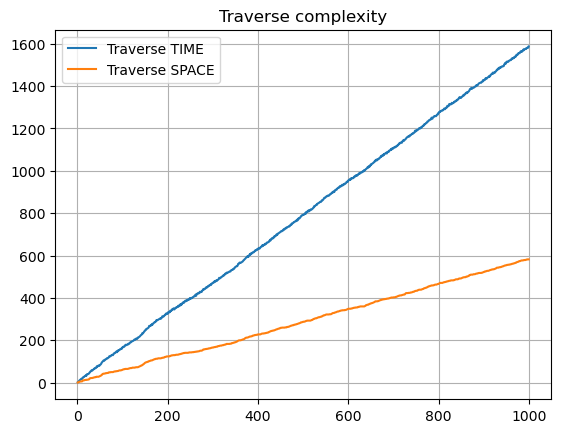

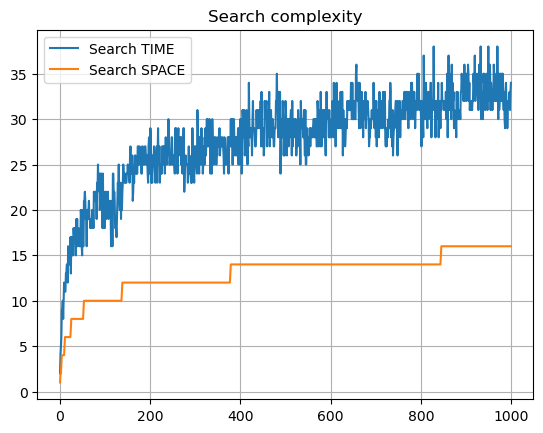

In [10]:
import string
import random
import matplotlib.pyplot as plt

time = 0
space = 0
splitTime = 0

def randString(length=5):
    characters = string.ascii_letters + string.digits
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

class Data:
    def __init__(self,key,value):
        self.key = key
        self.value = value
    
    def __str__(self):
        return "Key: " + str(self.key) + " - Value: " + str(self.value)
    
class BTreeNode:
    def __init__(self,t,leaf):
        self.t = t
        self.keys = [None] * (2 * t - 1)
        self.C = [None] * (2 * t)
        self.n = 0
        self.leaf = leaf

#                                           TIME || SPACE

    def insertNonFull(self,data):
        global time
        global space
        time += 1
        space += 1
        i = self.n - 1 # 5 || 1
        if self.leaf: # 3 || 1
            while i >= 0 and self.keys[i].key > data.key: # 10 (deg + 1) || 1
                time += 1
                self.keys[i+1] = self.keys[i] # 5 (deg) || 1
                i-=1 # 3 (deg) || 1
            self.keys[i + 1] = data # 6 || 1
            self.n += 1 # 4 || 1
        else: # 1 || 1
            while i >= 0 and self.keys[i].key > data.key: # 10 (deg + 1) || 1
                time +=1
                i-=1 # 3(deg) || 1
            if self.C[i+1].n == 2 * self.t - 1: # 9 || 1
                self.splitChild(i+1, self.C[i+1]) # O(deg) || 1
                if self.keys[i+1].key < data.key: # 7 || 1
                    i+=1 # 4 || 1
            self.C[i + 1].insertNonFull(data) # This is divided by two constantly due to if/else statement
            # 5 (log n) || (log n)      (This is multiplying all function)
    
    # TIME POLYNOMIAL: 44(log n) + 32(log n)(deg) = O(log n)
    # SPACE POLYNOMIAL: 14(log n) = O (log n)
    
    def splitChild(self,i,y):
        global splitTime
        z = BTreeNode(y.t, y.leaf) # 13 || 1
        z.n = self.t - 1 # 6 || 1
        for j in range (self.t-1): # 6 (deg) || 1
            splitTime += 1
            z.keys[j] = y.keys[j + self.t]  # 8(deg) || 1
        if not y.leaf: # 4 || 1
            for j in range(self.t): # 6 (deg + 1) || 1
                splitTime += 1
                z.C[j] = y.C[j + self.t] # 8(deg) || 1
        y.n = self.t -1 # 5 || 1
        
        for j in range(self.n, i , -1): # 6 (deg + 1) || 1
            splitTime += 1
            self.C[j + 1] = self.C[j] # 6(deg) || 1
        
        self.C[i+1] = z # 5 || 1
        for j in range(self.n -1,i-1, -1): # 6 (deg) || 1
            splitTime += 1
            self.keys[j+1] = self.keys[j] # 6(deg) || 1
            
        self.keys[i] = y.keys[self.t - 1] # 8 || 1
        self.n += 1 # 5|| 1
        
    # TIME POLYNOMIAL: 52 deg + 46 = O(1)
    # SPACE POLYNOMIAL: 15 = O(1)
    
    def traverse(self,l):
        global time
        global space
        time += 1
        space += 1
        for i in range(self.n): # 6 (deg+1) || 1
            time += 1
            if not self.leaf: # 4(deg) || 1
                self.C[i].traverse(l+1) # 7(deg * n) being n the number of entries in the tree || deg*n
            #print("\t"*l,l,self.keys[i],end = ' ') # O(print) || 1
        #print() # O(print) || 1
        if not self.leaf: # 4 || 1
            self.C[i + 1].traverse(l+1) # 7(deg * n) being n the number of entries in the tree || deg * n
        
    # TIME POLYNOMIAL: 24(n) + 10 (deg * n) = O(n)
    # SPACE POLYNOMIAL: 8(deg * n) = O(n)
        
    def search(self,k):
        global time
        global space
        time+=1
        space +=1
        i = 0 # 3 || 1
        while i < self.n and k > self.keys[i].key: # 10 (deg + 1) || 1
            time +=1
            i+=1 # 4(deg) || 1
        if i < self.n and k == self.keys[i].key: # 10 || 1
            return self # 1 || 1
        if self.leaf: # 4 || 1
            return None # 1 || 1
        return self.C[i].search(k) # We are pruning constantly the half of the values 6(log n) || log n
     
    # TIME POLYNOMIAL: 35(log n) +  14(log n)(deg) = O(log n)
    # SPACE POLYNOMIAL: 8(log n) = O(log n)
    
    
class BTree:
    def __init__(self,t):
        self.root = None
        self.t = t
    
    def traverse(self):
        if self.root != None:
            self.root.traverse(0)
    
    def search(self,k):
        return None if self.root == None else self.root.search(k)
    
    def insert(self, data):
        if self.root == None: # 5 || 1
            self.root = BTreeNode(self.t,True) # 13 || 1
            self.root.keys[0] = data # 7|| 1
            self.root.n = 1 # 5 || 1
        else:
            if self.root.n == 2 * self.t - 1: # 8 || 1
                s = BTreeNode(self.t,False) # 13 || 1
                s.C[0] = self.root # 6 || 1
                s.splitChild(0, self.root) # O(deg) || 1
                i = 0 # 3 || 1
                if s.keys[0].key < data.key: # 8 || 1
                    i+=1 # 4 || 1
                s.C[i].insertNonFull(data) # O(log n) || O (log n)
                self.root = s # 4 || 1
            else: # 1 || 1
                self.root.insertNonFull(data) # O(log n) || O (log n)
    
    # TIME POLYNOMIAL: 2(O(log n)) + O(deg) + 77 = O(log n)
    # SPACE POLYNOMIAL: 8(log n) + 13  = O(log n)

if __name__ == "__main__":
    deg = 2
    t = BTree(deg)
    
    n = 1000
    x = []
    yt = []
    ys = []
    
    t = BTree(deg)
    for i in range(1,n):
        x.append(i)
        time = 0
        splitTime = 0
        space= 0
        t.insert(Data(random.randint(-1000,1000),randString()))
        yt.append(time + splitTime)
        ys.append(space)

    plt.title("Insertion complexity")
    plt.plot(x,yt, label="Insertion TIME")
    plt.plot(x,ys,label="Insertion SPACE")  
    plt.grid(True)
    plt.legend()
    plt.show()
    
    x = []
    yt = []
    ys = []
    t = BTree(deg)
    for i in range(1,n):
        x.append(i)
        time = 0
        splitTime = 0
        space= 0
        t.insert(Data(random.randint(-1000,1000),randString()))
        yt.append(splitTime)
        ys.append(3)

    plt.title("Split complexity")
    plt.plot(x,yt, label="Split TIME")
    plt.plot(x,ys,label="Split SPACE")  
    plt.grid(True)
    plt.legend()
    plt.show()

    x = []
    yt = []
    ys = []
    t = BTree(deg)
    for i in range(1,n):
        x.append(i)
        time = 0
        space = 0
        splitTime = 0
        t.insert(Data(random.randint(-1000,1000),randString()))
        t.traverse()
        yt.append(time)
        ys.append(space)

    plt.title("Traverse complexity")
    plt.plot(x,yt, label="Traverse TIME")
    plt.plot(x,ys,label="Traverse SPACE")  
    plt.grid(True)
    plt.legend()
    plt.show()

    x = []
    yt = []
    ys = []
    t = BTree(deg)
    for i in range(1,n):
        x.append(i)
        time = 0
        space = 0
        t.insert(Data(random.randint(-1000,1000),randString()))
        t.search(1001)
        yt.append(time)
        ys.append(space)

    plt.title("Search complexity")
    plt.plot(x,yt, label="Search TIME")
    plt.plot(x,ys,label="Search SPACE")  
    plt.grid(True)
    plt.legend()
    plt.show()
            
